<a href="https://colab.research.google.com/github/nickv779/LADS-Notebooks/blob/main/Nicolas_Valiente_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: Num-pi
Lin. Alg. for Data Science.
# Due date: see discord/canvas

# Collaboration rules:
> This task is collaborative. Feel free to discuss on discord. Make sure you don't spoil the tasks for others though, so don't post code.

# Instructions:
-1. Copy the notebook.

0. Solve the tasks (by writing python code and answering extra questions, if any).

1. **Rename the notebook** like this: FirstName_LastName_HW1.ipynb (e.g. I'd rename it as: Hubert_Wagner_HW1.ipynb)

2. Run all the cells in the notebook, so that all results are visible.

3. **Important**: on colab create a shared link using the option **"for anyone with the link"** and switch permission from **Viewer** to **Editor**, so that it says "Anyone on the internet with the link can edit". Otherwise, I won't be able to read your work!

4. Submit the above link on canvas.

5. Later, *when the time comes* answer some brief questions about your solution via a google form I will send you. **This is part of the homework assignment**, so don't miss it!





# Usage of LLMs (ChatGPT etc.)

This is another simple task, which is meant for you to get proficient with the basics (and combining math and programming). It's a standard problem and ChatGPT is able to solve it -- but then you're not really practicing and you're just wasting your time... Later assignments will rely on insights (and programming proficiency) aquired in these simpler assignments -- and they are too complex for ChatGPT. I'd suggest you try to do this from scratch.

# What's reasonable usage (to maximize your learning):
- Ideally you should get used to doing tasks like this one from scratch. Remember that in the future you'll be solving tasks that LLMs can't, so practicing solving tasks on your own (or with other people) is a crucial skill.
- Asking LLMs for general advice (definitions, numpy functions) is  okay. But I'd get used to using documentation -- in your work you may **not** have this option! There may be internal documentation -- and it may be too small to effectively train/tune an LLM on!
- The moment your prompt contains details of the assignment, you won't learn nearly as much...
- Asking an LLM to write code you can't write means you're missing an oportunity to learn the programming/algorithmic basics, which you'll need in the future.

# If this assignment is too hard...
... you'll learn more by collaborating on discord.

# Overall,
the code you produce is useless! You don't really get a grade for producing it! What matters is what you've learned working on it.

# The value of $\pi$

## Task 0: Preparation

Draw $n=1000$ from the unit square $[0,1]\times[0,1]$. Plot the points which are inside the Euclidean unit ball in green, and the points outside in red.

## Description of the actual problem

They say the value of $\pi$ is $3.141...$ -- but now that we can compute things quickly with numpy, we can call their bluff and verify it ourselves!

> Next time we'll prove that Earth is flat!

To verify the value of $\pi$, we will perform an experiment in which we draw points as in Part 0 (but for a larger $n$). At any moment, we denote $t$ as the total number of points tested so far, and $b$ as the number of these points that were inside the unit ball.

Note that $4\frac{b}{t}$ approximates $\pi$, which allows us to approximate its value as close as we want!

> If you think about it, that's not terribly surprising. If you compute the area of the unit square and the area of the quarter ball (i.e. ball restricted to the unit square), you get $\pi/4$. And the probability that a point sampled (uniformally at random) from some 2-dimensional region of space will be inside some 2-dimensional sub-region depends on the ratio of areas of the two regions.

> Also, we may need a lot of time to get a really good approximation...


## Task 1: Implementation [main part]
Implement the above idea.

In a **single experiment** you will start from drawing $n$ points, as described above. You will **repeat the experiment 10 times** using the same value of $n$.

Now, try to find the value $n$ for which you get the approximation $3.141$...  (at least 50% of the time). (So if 5 out of your 10 experiments look good, you're good.)

> There is no need to find the *best* $n$. Due to the randomness it doesn't exist, and technically you could get a terrible approximation even for huge $n$. Any $n$ that works will do!


> **Super important**: you don't just want the final approximation for $n$ points -- for full credit you **must keep track** of the approximation you got using the $i$ initial points in the experiment -- **for each** $i$ between $1$ and $n$. So you'll have to be smart about your computations. You'll need a more efficient algorithm for this. Hint: we did something similar in class!

### Timing requirement
All experiments in Task 1, should run in roughly $7$ seconds or less. (This  does not include plotting in the next part.)

## Task 2: Visualization

For each of the 10 experiments, plot how your approximation of $\pi$ changed at each $k$ between $1$ to $n$. So for each experiment you will get a single curve. Plot all curves on a single figure. You should see 10 curves converging to a similar value. Make sure the plot is easy to analyze (for example, you may need to cut some percentage of the initial results, and maybe plot only some fraction of the values).

## Example plot in task 2

The plot you produce should look like this. (I cropped the bottom part so that it does not to reveal how large $n$ should be.)

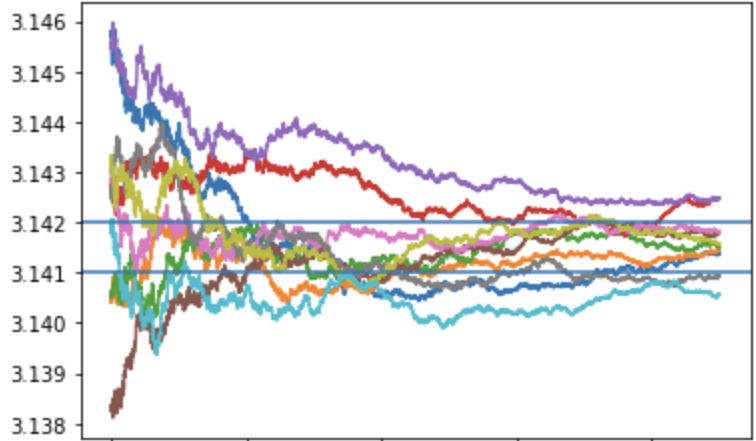

## Clirification: Example experiment for n=10


Here is an example output from a single experiment for n = 10:

[0., , 2. , 1.33333333, 1. , 1.6, 2., 1.71428571, 1.5, 1.77777778, 2.]

An array like this is what you should compute for a single experiment. And then just repeat 10 times and visualize.


Each number shows the approximation after considering 1,2,3,...10 points. In particular the first point was outside of the ball, so the approximation is $4\times0/1 = 0$. The second one is $4\times1/2=2$ etc.

Note that the final approximation, namely 2, is terrible and we clearly need a much larger $n$.

> Or is it? Maybe we cold actually prove that the Earth is flat if $\pi = 2$?

In any case, the *last* approximation should look like:

$3.141$[some more digits].

> Note that stopping an experiment as soon as you hit $3.141$... is **not** okay. You should *converge* to this value and not randomly get it.


# Tip

In [1]:
# Tip for part 1:
inside = [1,0,1,0,0,0,1,1]
# We talked how to quickly compute
so_far = [1, 1, 2, 2, 2, 2, 3, 4]
# such that so_far[i] tell us how many ones there were in interval [0:i]
# also, what's
True + False + True
# ?

2

# Your solution

> Feel free to split it into multiple code cells

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt

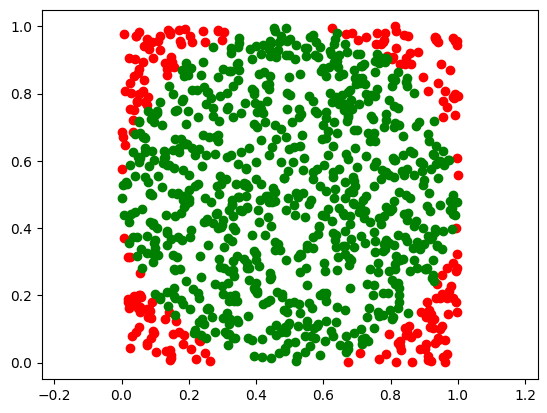

In [2]:
# Task 0

N = 1000
P = np.random.rand(N, 2)
norms = np.linalg.norm(P - [0.5, 0.5], axis=1)
outside = P[(norms > 0.5)]
inside = P[(norms < 0.5)]
plt.scatter(*outside.T, c="red")
plt.scatter(*inside.T, c="green")
plt.axis('equal')
plt.show()

In [3]:
# Task 1

n = 2000000 # changing value
all_approximations = []
indices = np.linspace(1, n, num=n, dtype=int)
for _ in range(10):
    P = np.random.rand(n, 2)
    norms = np.linalg.norm(P - [0.5, 0.5], axis=1)
    approximations = 4 * np.cumsum((norms < 0.5).astype(int)) / indices
    all_approximations.append(approximations)

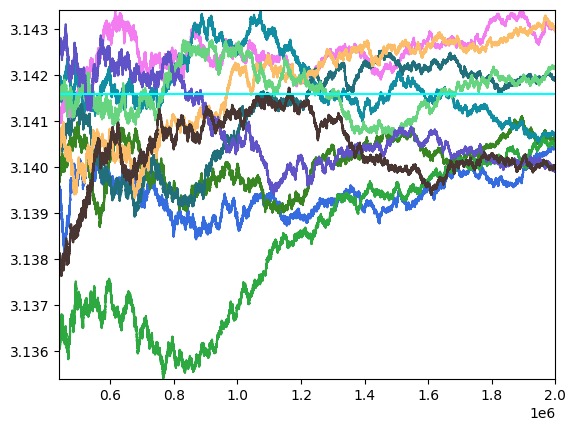

In [4]:
# Task 2

x_vals = [i for i in range(1, n+1)]
x_start = int(0.22*n)
colors = np.random.random((10, 3))
y_min, y_max = np.min(np.array(all_approximations)[:, x_start:]),np.max(np.array(all_approximations)[:, x_start:])
for x in range(10):
    plt.plot(x_vals, all_approximations[x], c = colors[x])
plt.axhline(y=np.pi, color='cyan')
plt.axis([x_start, n, y_min, y_max])
plt.show()

## Evaluation criteria

Later I will send you a form asking a bunch of question about your solutions.

Some things to look out for:
- correctness
- clear visualization for task
- code readability (good variable and function names)
- good comments (especially for any functions you implement)
- efficiency (use numpy wisely, avoid *long* python for loops)

In [6]:
# your code

# Bonus [some extra credit]

What would happen in Part 1 if we chose a different metric, for example used np.linalg.norm(..., order=p), for p=1, 3, or something large? Does Part 2 still make sense in this case? I will ask you for this in the form, but you can play with this below and note down any answers.